# Gauss on surfaces，曲面的一般研究

## 1. 辅助球面

辅助球面是一个单位球面，球面上的点对应了某个方向。球面上有三个特殊点分别对应了三个坐标轴的方向。这三个点或者方向分别命名为 (1)、(2)、(3)。这三个方向是正交的，也就是两两垂直的。

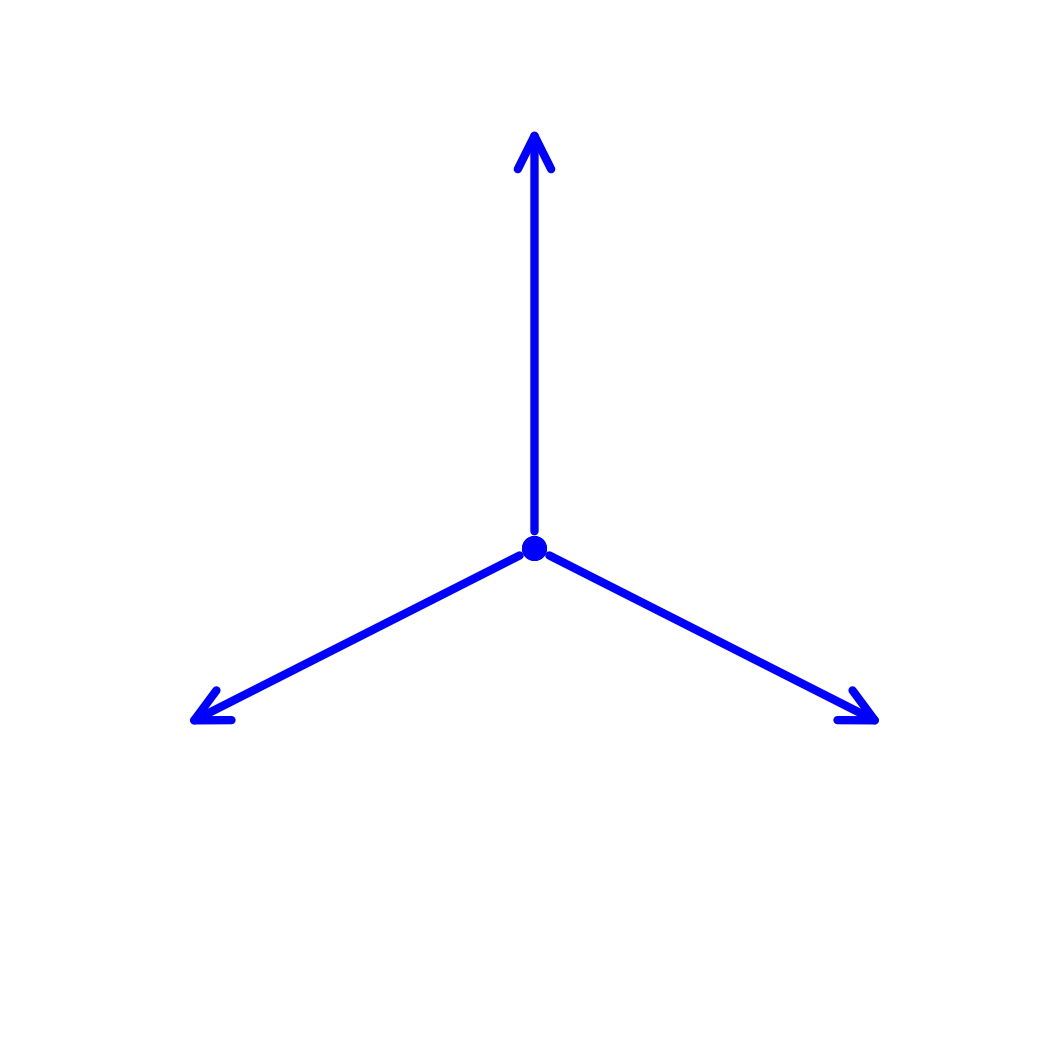

In [165]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import numpy as np
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.figsize'] = [2, 2]

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)

def gen_a_simple_figure():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    #ax.invert_yaxis()
    ax.set_zlabel("z")
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_zlim([0, 10])
    ax.set_axis_off()

    ax.view_init(30, 45)

    a = Arrow3D([0, 10], [0, 0], [0, 0], mutation_scale=10, lw=1, arrowstyle="->", color="b")
    ax.add_artist(a)
    a = Arrow3D([0, 0], [0, 10], [0, 0], mutation_scale=10, lw=1, arrowstyle="->", color="b")
    ax.add_artist(a)
    a = Arrow3D([0, 0], [0, 0], [0, 10], mutation_scale=10, lw=1, arrowstyle="->", color="b")
    ax.add_artist(a)

    ax.plot([0,0],[0,0], [0,0], marker='o', markersize=2, color='b')

    # Set an equal aspect ratio
    ax.set_aspect('equal')
    #ax.legend()

    return fig, ax

gen_a_simple_figure()

plt.show()


